# Task 6.3 - Geographical Visualizations with Python

## Table of Content:

### 1 Import libraries and datasets
### 2 Data Wrangling
### 3 Data Cleaning
#### 3.1 Check for missing values
#### 3.2 Check for duplicates
#### 3.3 Check for extreme values
### 4 Chloropleth of 'State' and 'Total Sales'
### 5 Discussing results

## 1 Import libraries and datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
# Create 'path'
path = r'C:\Users\Longus\Documents\Adidas Sales Project - CF'

In [4]:
# Import ".json" file for the U.S.
country_geo = r'C:\Users\Longus\Documents\Adidas Sales Project - CF\Original Data\us-states.json'

In [5]:
# To look at the JSON file contents here too:
f = open(os.path.join(path, 'Original Data', 'us-states.json'))

# Returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
# Import the 'Adidas US Sales' dataset
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Adidas_US_Sales_clean.csv'))

In [7]:
df

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


## 2 Data Wrangling

In [8]:
# Remove column 'Unnamed: 0'
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


## 3 Data Cleaning

### 3.1 Check for missing values

In [10]:
df.isnull().sum()
# No missing values

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

### 3.2 Check for duplicates

In [11]:
dups = df.duplicated()

In [12]:
dups.shape
# No duplicates

(9648,)

### 3.3 Check for extreme values

<AxesSubplot:xlabel='Price per Unit', ylabel='Count'>

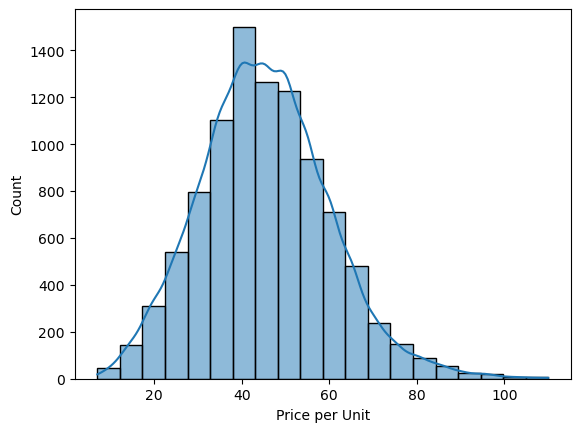

In [13]:
# Check for extreme values in 'Price per Unit'
sns.histplot(df['Price per Unit'], bins=20, kde = True)

In [14]:
df[df['Price per Unit'] > 300]
# No extreme value

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


<AxesSubplot:xlabel='Units Sold', ylabel='Count'>

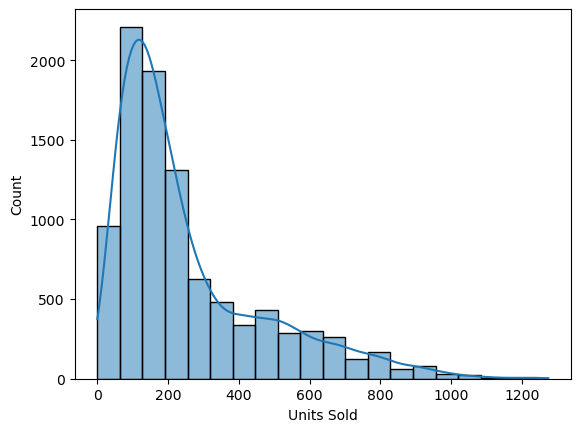

In [15]:
# Check for extreme values in 'Units Sold'
sns.histplot(df['Units Sold'], bins=20, kde = True)

In [16]:
df[df['Units Sold'] > 10000]
# No extreme value

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


<AxesSubplot:xlabel='Operating Margin', ylabel='Count'>

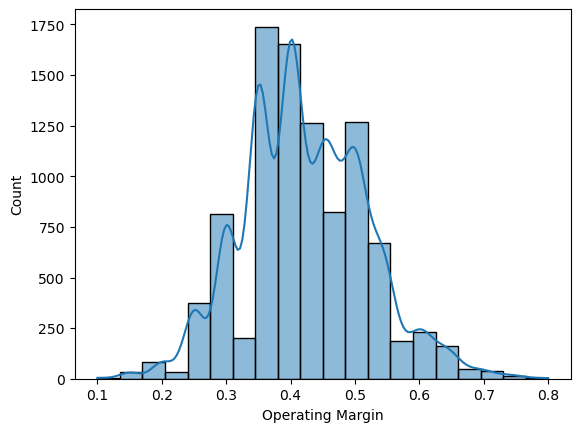

In [17]:
# Check for extreme values in 'Operating Margin'
sns.histplot(df['Operating Margin'], bins=20, kde = True)

In [18]:
df[df['Operating Margin'] > 1]
# No extreme value

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


## 4 Chloropleth of 'State' and 'Total Sales'

In [19]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

cp = folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['State', 'Total Sales'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Sales").add_to(map)
folium.LayerControl().add_to(map)

for s in cp.geojson.data['features']:
    if s['properties']['name'] in df["State"].values:
        s['properties']['Total Sales'] = df.loc[df['State'] == s['properties']['name'], 'Total Sales'].iloc[0]
    else:
        s['properties']['Total Sales']=0    
        
folium.GeoJsonTooltip(['name','Total Sales']).add_to(cp.geojson)

map

## 5 Discussing results

#### One of the questions that was initially generated was: "Which retailers generate most revenue in each region/state?"
#### While the question could not be answered yet, we at least have the total sales/revenue in each region. If supplemented with the retailer ID, we can answer the initial question.

In [20]:
# Export the dataset
df.to_csv(os.path.join(path, 'Prepared Data', 'Adidas_US_Sales_6_3.csv'))